Inainte sa trimiti notebook-ul:

* asigura-te ca totul se executa cum trebuie. Prima oara, **restarteaza kernel-ul** (in meniu, selecteaza Kernel$\rightarrow$Restart & Run all);

* nu lasa niciun mesaj la output (`disp`, `printf`, linii care nu sunt incheiate cu `;`) in functiile pe care le scrii decat daca ti se specifica explicit sa faci acest lucru! Orice abatere va fi **depunctata automat** de grader;

* citeste instructiunile de [aici](https://github.com/radusqrt/numerical-methods/blob/master/lab_instructions.md) cu atentie;

* asigura-te ca rezolvi toate celulele in care scrie `YOUR CODE HERE` sau `YOUR ANSWER HERE` si ca iti treci numele mai jos:

In [1]:
STUDENT_NAME = "Petruc Rares";

---

# Laborator 11-12: Integrare numerică
### Autor: Radu Stochitoiu

## Functii ajutatoare

In [2]:
function plot_trapezoidal(f, a, b, n)
    hold;
    xx = linspace(a, b);
    h = (b - a) / n;
    plot(xx, f(xx), 'b');
    for x = a:h:b-h
        plot([x, x+h], [f(x), f(x+h)], 'r');
    endfor
    plot([a:h:b], f([a:h:b]), 'o', 'markersize', 10);
endfunction

function plot_simpson(f, a, b, n)
    hold;
    xx = linspace(a, b);
    h = (b - a) / (2*n);
    plot(xx, f(xx), 'b');
    for x = a:2*h:b-h
        L = polyfit([x, x+h, x+2*h], [f(x), f(x+h), f(x+2*h)], 2);
        xx = linspace(x, x+2*h);
        yy = polyval(L, xx);
        plot(xx, yy, 'r');
    endfor
    plot([a:h:b], f([a:h:b]), 'o', 'markersize', 10);
endfunction

## Problema 1

Implementati funcția ```trapezoidal(f, a, b, n)``` ce primește un handle la o funcție $f$, un interval, $[a, b]$, un număr de subintervale, $n$, și returnează valoarea integralei numerice aproximate cu regula trapezelor.

In [3]:
function [T] = trapezoidal(f, a, b, n)
    h = (b-a)/n;
    x = [a+h:h:b-h];
    T = h/2*(f(a) + f(b)+ 2*sum(f(x)));
endfunction

res =  0.26916


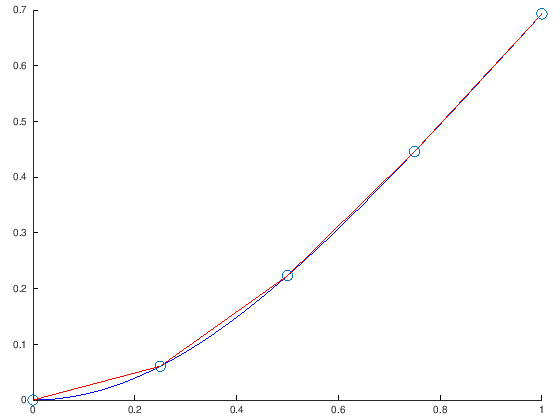

In [4]:
% ex4_lab 11

function [y] = f(x)
    y = log(1+x.^2);
endfunction

res = trapezoidal(@f, 0, 1, 4)
plot_trapezoidal(@f, 0, 1, 4);

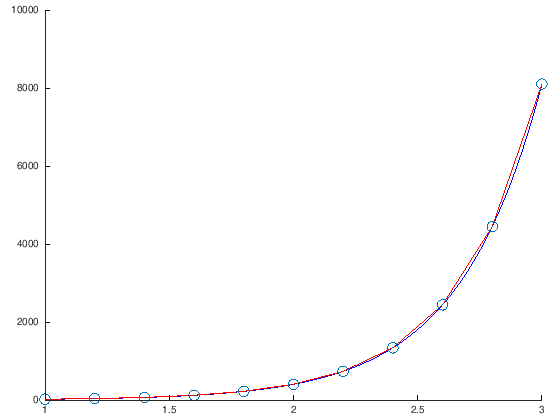

In [5]:
% ex4_lab 11

function [y] = f(x)
    y = exp(3*x);
endfunction

res = trapezoidal(@f, 1, 3, 10);
plot_trapezoidal(@f, 1, 3, 10);

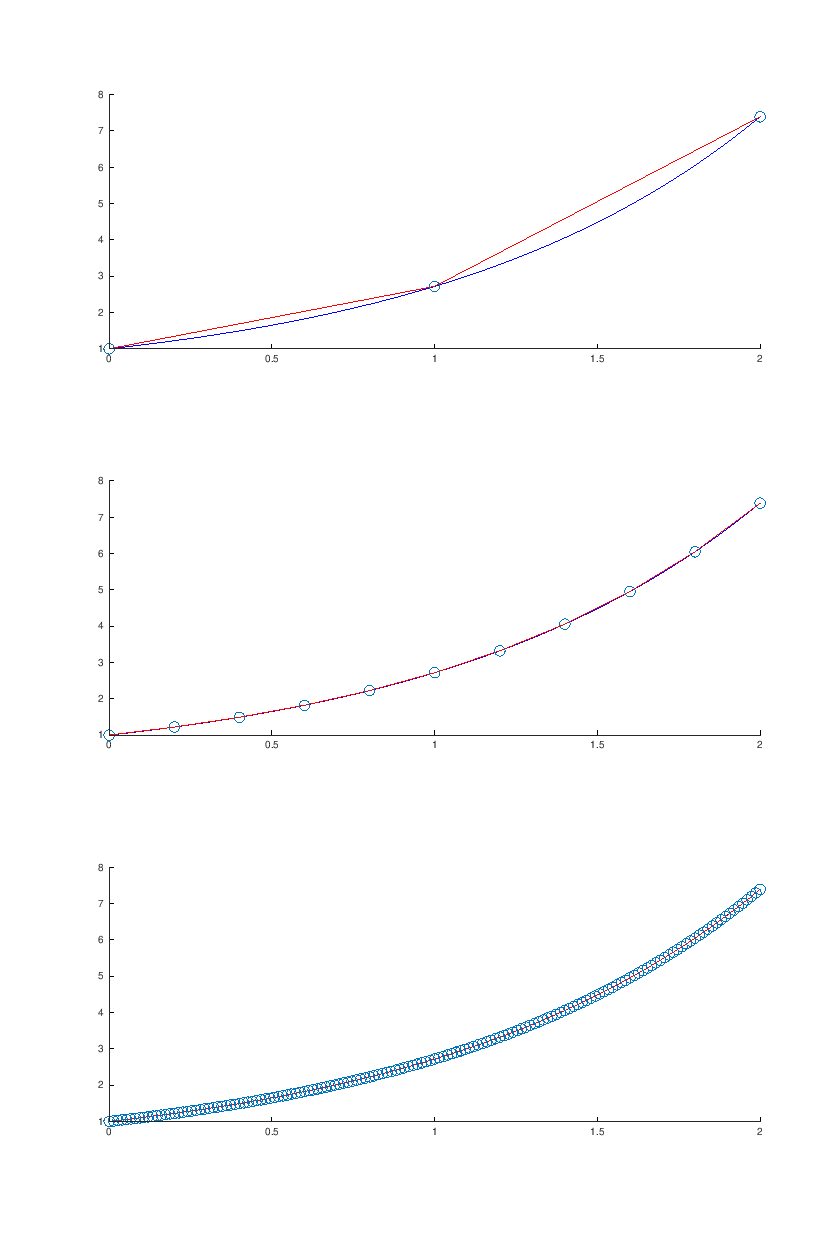

In [6]:
function [y] = f(x)
    y = exp(x);
endfunction

res = trapezoidal(@f, 0, 2, 2);
assert(norm(res - 6.9128) < 1e-4);
subplot(3, 1, 1);
plot_trapezoidal(@f, 0, 2, 2);

res = trapezoidal(@f, 0, 2, 10);
assert(norm(res - 6.4103) < 1e-4);
subplot(3, 1, 2);
plot_trapezoidal(@f, 0, 2, 10);

res = trapezoidal(@f, 0, 2, 150);
assert(norm(res - 6.3892) < 1e-4);
subplot(3, 1, 3);
plot_trapezoidal(@f, 0, 2, 150);

pos = get(gcf,'Position');
pos(3) *= 1.5;
pos(4) *= 3;
set(gcf, 'Position', pos);

## Problema 2

Implementati funcția ```simpson(f, a, b, n)``` ce primește un handle la o funcție $f$, un interval, $[a, b]$, un număr $n$ (vor fi $2n$ subintervale), și returnează valoarea integralei numerice aproximate cu regula Simpson.

In [7]:
function [S] = simpson(f, a, b, n)
    h = (b-a)/(2*n);
    x2i_1 = [a+h:2*h:b-h];
    x2i = [a+2*h:2*h:b-2*h];
    S = h/3*(f(a)+f(b)+4*sum(f(x2i_1)) + 2*sum(f(x2i)));
endfunction

In [27]:
function [steps, S] = adaptive_simpson(f, a, b, tol)
    
    c = (a+b)/2;
    S2_ = simpson(f, a, c, 1);
    S2__ = simpson(f, c, b, 1);
    S2 = S2_+S2__;
    
    S1 = simpson(f, a, b, 1);
    
    if (abs(S2 - S1) < 15*tol)

        steps = 1;
        S = S2 + (S2-S1)/2;

    else

        [stepsl, Sl] = adaptive_simpson(f, a, c, tol/2);
        [stepsr, Sr] = adaptive_simpson(f, c, b, tol/2);
        S = Sl+Sr;

        steps = stepsl+stepsr;

    endif


endfunction

In [29]:
function [y] = f(x)
    y = sin(1./x);
endfunction

[steps, res1] = adaptive_simpson(@f, 0.1, 2, 1e-3)
res2 = simpson(@f, 1, 3, 50)
norm(res1-res2)
%assert(norm(res - 3.347201142e+03) < 1e-4);

steps =  8
res1 =  1.1459
res2 =  1.0266
ans =  0.11937


res =  1.3713


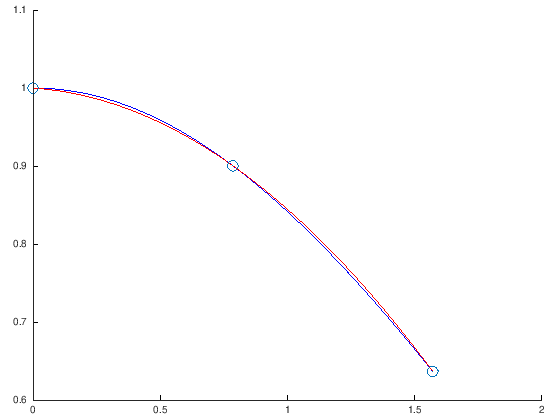

In [10]:
% ex_4 lab11
% ex_3 lab11
function [y] = f(x)
    y = sin(x) ./ (x);
endfunction

res = simpson(@f, 1e-10, pi/2, 1)
plot_simpson(@f, 1e-10, pi/2, 1);

res =  11.174


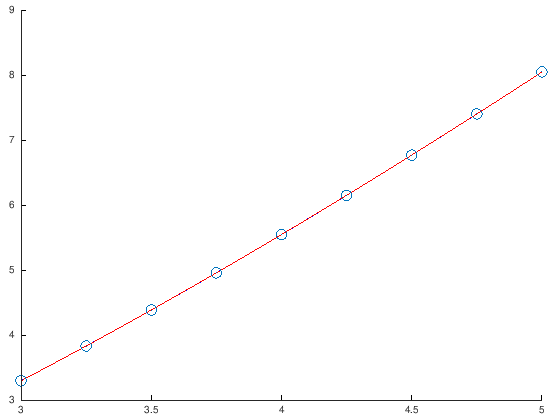

In [11]:
% ex_3 lab11
function [y] = f(x)
    y = x .* log(x);
endfunction

res = simpson(@f, 3, 5, 4)
plot_simpson(@f, 3, 5, 4);

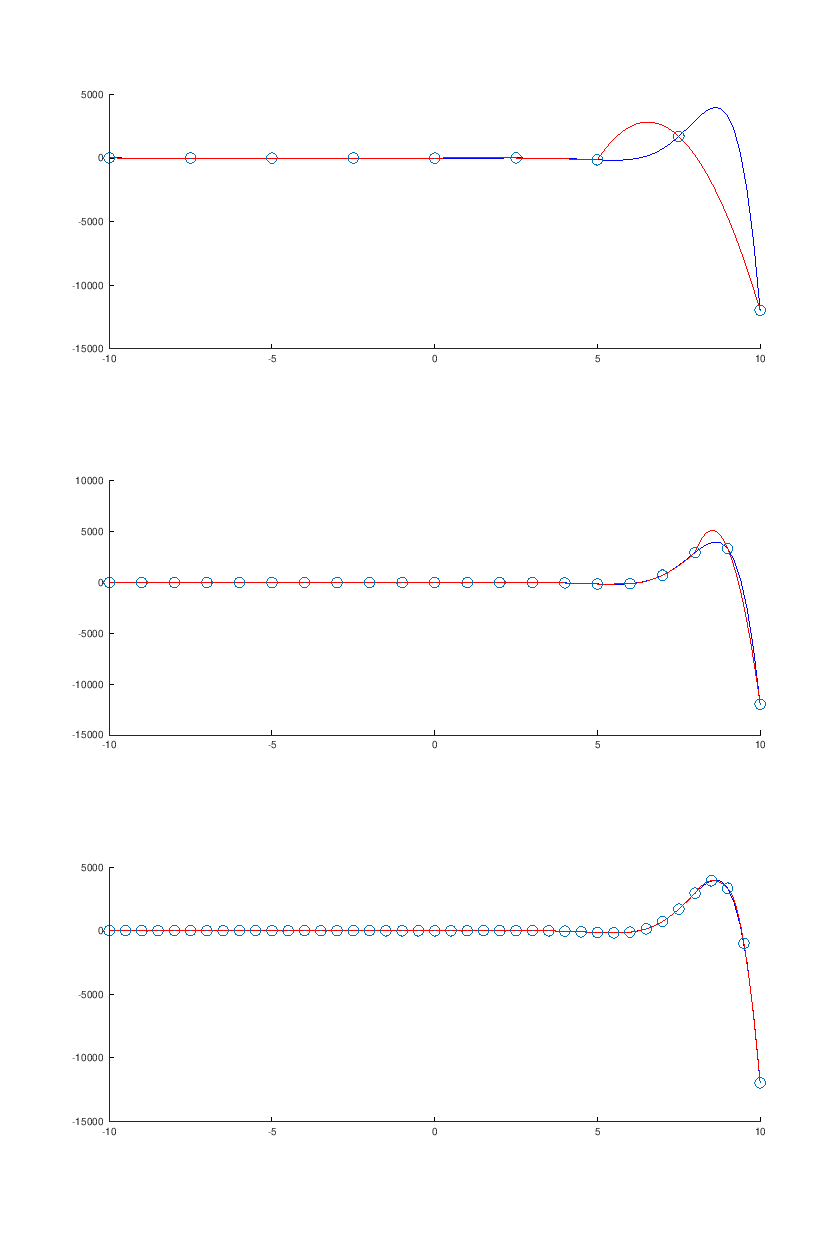

In [12]:
function [y] = f(x)
    y = exp(x) .* sin(x) + sqrt(x.^2 + 1);
endfunction

res = simpson(@f, -10, 10, 4);
assert(norm(res - (-4441.813339)) < 1e-4);
subplot(3, 1, 1);
plot_simpson(@f, -10, 10, 4);

res = simpson(@f, -10, 10, 10);
assert(norm(res - 3206.95473) < 1e-4);
subplot(3, 1, 2);
plot_simpson(@f, -10, 10, 10);

res = simpson(@f, -10, 10, 20);
assert(norm(res - 3.347201142e+03) < 1e-4);
subplot(3, 1, 3);
plot_simpson(@f, -10, 10, 20);

pos = get(gcf,'Position');
pos(3) *= 1.5;
pos(4) *= 3;
set(gcf, 'Position', pos);

## Problema 3

Implementati funcția ```romberg(f, a, b, n)``` ce primește un handle la o funcție $f$, un interval, $[a, b]$, un număr $n$ și returnează valoarea integralei numerice aproximate cu Romberg ($R(n, n)$).

In [13]:
function [R] = romberg(f, a, b, n)
    h = (b-a)/n;
    RMatrix = zeros(n+1);
    for i = 1:n+1
        RMatrix(i, 1) = trapezoidal(@f, a, b, 2^(i-1));
    endfor
    
    for j = 2:n+1
        for i = j:n+1
            RMatrix(i, j) = RMatrix(i, j-1) + (RMatrix(i, j-1)-RMatrix(i-1, j-1))/(2^(2*j-2)-1);
        endfor
    endfor
    R = RMatrix(n+1, n+1);
endfunction

In [14]:
function [y] = f(x)
    y = x .* log(x);
endfunction

res = romberg(@f, 3, 5, 3)

res =  11.174


In [15]:
function [y] = f(x)
    y = sin(x) .* (x.^2 + exp(x)) .^ (0.7);
endfunction

res = romberg(@f, -20, 20, 2);
assert(norm(res - 3.407222054e+06) < 1e-3);

res = romberg(@f, -20, 20, 5);
assert(norm(res - 1.613822232e+05) < 1e-3);

res = romberg(@f, -20, 20, 7);
assert(norm(res - 1.864509845e+05) < 1e-3);

In [16]:
% ex 1_lab11

In [17]:
x = [0.2, 0.5, 0.9];
f = @(x) sin(x);

h = 1e-10;
deriv0 = (f(x(1)+h)-f(x(1)))/h
deriv1 = (f(x(2)+h)-f(x(2)))/h
deriv2 = (f(x(3)+h)-f(x(3)))/h

deriv0 =  0.98007
deriv1 =  0.87758
deriv2 =  0.62161


In [18]:
%ex 2_lab11

In [19]:
function yi = Neville(x, y, xi)
n = length(x);
for k = 1 : n-1
    for i = 1 : n-k
        raport = (xi-x(k+i))/(x(i)-x(k+i));
        y(i) = raport*y(i)+(1-raport)*y(i+1);
    endfor
endfor
yi = y(1);
endfunction

In [20]:
x = [2.3, 2.5, 2.7];
fx = [992.27, 1808.04, 3294.47];

h = 1e-12;


% midpoint formula
% yy_ = f(x0 - h)
% yy__ = f(x0 + h)
yy_ = Neville(x, fx, x(1)-h);
yy__ = Neville(x, fx, x(1)+h);
fDerivX1 =1/(2*h)*(yy__- yy_);

yy_ = Neville(x, fx, x(2)-h);
yy__ = Neville(x, fx, x(2)+h);
fDerivX2 =1/(2*h)*(yy__-yy_);

yy_ = Neville(x, fx, x(3)-h);
yy__ = Neville(x, fx, x(3)+h);
fDerivX3 =1/(2*h)*(yy__-yy_);

% endpoint formula
% yy_ = f(x0+h);
% yy__ = f(x0+2h);
yy_ = Neville(x, fx, x(1)+h); 
yy__ = Neville(x, fx, x(1)+2*h); 
fDerivX1 =1/(2*h)*(-3*fx(1) + 4*yy_-yy__);


yy_ = Neville(x, fx, x(2)+h); 
yy__ = Neville(x, fx, x(2)+2*h); 
fDerivX2 =1/(2*h)*(-3*fx(2) + 4*yy_-yy__);

yy_ = Neville(x, fx, x(3)+h); 
yy__ = Neville(x, fx, x(3)+2*h); 
fDerivX3 =1/(2*h)*(-3*fx(3) + 4*yy_-yy__);

f = @(x) e.^(3*x);
x = [2.3, 2.5, 2.7];
fx = f(x);

% midpoint formula
% yy_ = f(x0 - h)
% yy__ = f(x0 + h)
yy_ = Neville(x, fx, x(1)-h);
yy__ = Neville(x, fx, x(1)+h);
fDerivX1 =1/(2*h)*(yy__- yy_);

yy_ = Neville(x, fx, x(2)-h);
yy__ = Neville(x, fx, x(2)+h);
fDerivX2 =1/(2*h)*(yy__-yy_);

yy_ = Neville(x, fx, x(3)-h);
yy__ = Neville(x, fx, x(3)+h);
fDerivX3 =1/(2*h)*(yy__-yy_);

% endpoint formula
% yy_ = f(x0+h);
% yy__ = f(x0+2h);
yy_ = Neville(x, fx, x(1)+h); 
yy__ = Neville(x, fx, x(1)+2*h); 
fDerivX1 =1/(2*h)*(-3*fx(1) + 4*yy_-yy__);


yy_ = Neville(x, fx, x(2)+h); 
yy__ = Neville(x, fx, x(2)+2*h); 
fDerivX2 =1/(2*h)*(-3*fx(2) + 4*yy_-yy__);

yy_ = Neville(x, fx, x(3)+h); 
yy__ = Neville(x, fx, x(3)+2*h); 
fDerivX3 =1/(2*h)*(-3*fx(3) + 4*yy_-yy__);